## Exploratory Data Analysis on NYC Taxi Trip Duration

### Steps involved:
1. Importing Necessary libraries
2. Importing the dataset
3. Exploring the dataset
4. Univariate Analysis
5. Bivariate Analysis

### Business Objective 
1. Explore the dataset and generate insights from it


### 1. Importing Necessary Libraries

In [2]:
! pip install haversine

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from haversine import haversine, Unit
from scipy.stats import skew, kurtosis
sns.set() 
%matplotlib inline

### 2. Importing the dataset


In [4]:
# Importing the provided dataset from the data folder.

df = pd.read_csv('data/nyc_taxi_trip_duration.csv')

### 3. Exploring the dataset

In [5]:
# Checking the five first rows of the dataset
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [6]:
# Checking the last five rows of the dataset
df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447
729321,id1053441,2,2016-01-01 17:24:16,2016-01-01 17:44:40,4,-74.003342,40.743839,-73.945847,40.712841,N,1224


### 4. Data Analysis

In this section we will start analyzing the dataset. We will use several functions and methods to determine the following:

- The size of the dataset
- The datatypes of each variable (feature)
- The number of missing values
- The number of unique values per datatype
- The number of unique values per feature(variable)
- Generate a summary statistics for numerical and non-numerical variables

### 4.1 Variable Identification and Datatype

In [7]:
# Using df.info to start analyzing the variables of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


After running the .info() method we can determine following:

- The data set has 729,322 rows (entries) and 11 columns (features)
- The datatypes of these variables are (4) four floats, (3) three integers, and (4) four objects
- The dataset has no null values
- The dataset has two features 'pickup_datetime' and 'dropoff_datetime' as a datatype of "object". We should change the datatype of these variables to "datetime" datatype.
- Once we have changed the datatype of the pickup_datetime and dropoff_datetime variables we can create additional features for this dataset.
- The features pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude can be used to create a new feature. This feature will contain the distance of each trip.
- Finally, we can state that we have 10 independent variables and 1 dependent variable that we will call the Target Variable

### Checking for Null values

In [9]:
# Getting the unique values for each variable
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

After using .isnull.sum() we can safely conclude that there are no missing values.

### Checking for Unique Values

In [12]:
# Unique values
df.nunique()

id                    729322
vendor_id                  2
pickup_datetime       709359
dropoff_datetime      709308
passenger_count            9
pickup_longitude       19729
pickup_latitude        39776
dropoff_longitude      27892
dropoff_latitude       53579
store_and_fwd_flag         2
trip_duration           6296
dtype: int64

After using the .nunique() method we can state the following:

- There are no duplicate values in the id column.
- There are only two vendors. 1 or 2
- There are only two values for store_and_fwd_flag column. Which we now it is "Y" or "N"

### Summary Statsics for Numerical Variables

In [14]:
df.describe ()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


After using the .describe() method we can determine the following:

- Reiterate that there are no null values in the numerical variables.
- The vendor_id column appears to only have two values, which means that there might be only two vendors.
- The passenger_count allow us to determine that most of the taxi trips include 1 -2 passangers. The max number of passenger is 9. We will need to check for the presence of outliers when we conduct our univariate analysis.
- The trip_duration column provides us the duration of each trip in seconds. We will analyze this column seperately to see if we see any outliers.

### Summary Statistics for Non-Numerical Variable

In [16]:
df.describe (include=object)

,id,pickup_datetime,dropoff_datetime,store_and_fwd_flag
count,729322,729322,729322,729322
unique,729322,709359,709308,2
top,id2090507,2016-05-20 09:03:18,2016-01-15 20:27:47,N
freq,1,4,4,725282


After using the .describe() method on non-numerical variables we can determine the following:

- There are no null values on the non-numerical columns.
- The id column shows a frequency of 1, meaning that they are unique values.

### 4.2 Converting Features to the right Datatype

In this section we will convert the pickup_datetime and dropoff_datetimeto the DataTime datatype. The conversion of these two features to the right datatype will allow us to get a new features using the datetime library.

In [17]:
# Changing the pickup_datetime and dropoff_datetime from object to datetime datatype

df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])

In [18]:
# Checking to new datatype for pickup_datetime and dropoff_datetime

print(df['pickup_datetime'].dtypes)
print(df['dropoff_datetime'].dtypes)

datetime64[ns]
datetime64[ns]


### 4.3 Creating New Features

Here, we will be creating new features form existing ones. The features that we will be creating are:

- Create new features using the pickup_datetime and dropoff_datetime columns.
- Create a new feature called distance using the pickup_longitude, pickup_latitude dropoff_longitude, and the dropoff_latitude.
- Create a new feature called average_speed using the distance and trip_duration.

### 4.3.1 Creating Features based on Date and Time

In this section we will be creating eight (8) new feature using the pickup_datetime and dropoff_datetime

In [19]:
# Creating features based on month

df['pickup_by_month'] = df['pickup_datetime'].dt.month
df['dropoff_by_month'] = df['dropoff_datetime'].dt.month

In [20]:
# Creating features based on weekday

df['pickup_by_weekday'] = df['pickup_datetime'].dt.weekday
df['dropoff_by_weekday'] = df['dropoff_datetime'].dt.weekday

In [21]:
# Creating features based on day

df['pickup_by_day'] = df['pickup_datetime'].dt.day_name()
df['dropoff_by_day'] = df['dropoff_datetime'].dt.day_name()

In [22]:
# Creating features based on Hour

df['pickup_by_hour'] = df['pickup_datetime'].dt.hour
df['dropoff_by_hour'] = df['dropoff_datetime'].dt.hour

Now that we have the pickup time and the dropoff time we can determine the part of the day they fall into. As we know the day is divied in four parts. These parts are:

- Morning, which starts at 6:01 am and ends at 12:oopm
- Afternoon, which starts at 12:01 pm and ends at 18:00pm
- Evening, which starts at 18:01 and ends at 21:00pm
- Night, which start at 21:01 and ends at 6:00am

In [24]:
def part_of_day (time):
    if time in range (6,12):
        return "Morning"
    elif time in range (12,18):
        return "Afternoon"
    elif time in range (18,21):
        return "Evening"
    else:
        return "Night"

In [25]:
# Creating two new features called pickup_part_of_day and dropoff_part_of_day.

df['pickup_part_of_day']=df['pickup_by_hour'].apply(part_of_day)
df['dropoff_part_of_day']=df['dropoff_by_hour'].apply(part_of_day)

In [26]:
# Check to see if the formula has been applied correctly 

df[['pickup_part_of_day','dropoff_part_of_day']].head()

,pickup_part_of_day,dropoff_part_of_day
0,Afternoon,Afternoon
1,Night,Night
2,Afternoon,Evening
3,Morning,Morning
4,Morning,Morning


### 4.3.2 Creating a feature based on Location

- In this section we will use the pickup_longitude, pickup_latitude, dropoff_longitude, and the dropoff_latitude to create a new feature named distance. 
- We will use the Haversine python library to calculate the distance (in miles) between the pickup coordinance and the dropoff coordinance.

In [27]:
point_a = (40.778873, -73.953918) # (lat, lon)
point_b = (40.771164, -73.963875)
haversine(point_a, point_b, unit=Unit.MILES)

0.7450687743487803

In [28]:
# Create a function to determine the distance between two coordinate
def trip_distance(pickup_latitude,pickup_longitude, dropoff_latitude,dropoff_longitude):
    start_coo = (pickup_latitude,pickup_longitude)
    finish_coo = (dropoff_latitude,dropoff_longitude)
    
    return haversine(start_coo,finish_coo, unit=Unit.MILES)

In [29]:
df['distance'] = df.apply(lambda x: trip_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude']), axis=1)

In [30]:
# Checking to see that distance has been calculated
df['distance'].head()

0    0.745070
1    2.565714
2    4.505415
3    1.467120
4    2.689630
Name: distance, dtype: float64

In [31]:
# Creatring the speed feature using the formula (s = d/t) <- Given in Miles per Hour

df['average_speed'] = df['distance']/(df['trip_duration']/3600)

In [32]:
df['average_speed'].head().round(4)

0     6.7056
1     8.3969
2     9.9202
3     4.6289
4    11.4182
Name: average_speed, dtype: float64

### 4.3.3 Checking New features created 

Now that we have finished creating the new features it is recommended to see the update dataframe df

In [34]:
 # Display the first five rows

df[['pickup_by_month','dropoff_by_month','pickup_by_weekday', 'dropoff_by_weekday','pickup_by_day','dropoff_by_day','pickup_by_hour','dropoff_by_hour','pickup_part_of_day','dropoff_part_of_day','distance','average_speed']].head()


,pickup_by_month,dropoff_by_month,pickup_by_weekday,dropoff_by_weekday,pickup_by_day,dropoff_by_day,pickup_by_hour,dropoff_by_hour,pickup_part_of_day,dropoff_part_of_day,distance,average_speed
0,2,2,0,0,Monday,Monday,16,16,Afternoon,Afternoon,0.745070,6.705632
1,3,3,4,4,Friday,Friday,23,23,Night,Night,2.565714,8.396883
2,2,2,6,6,Sunday,Sunday,17,18,Afternoon,Evening,4.505415,9.920180
3,1,1,1,1,Tuesday,Tuesday,9,10,Morning,Morning,1.467120,4.628950
4,2,2,2,2,Wednesday,Wednesday,6,6,Morning,Morning,2.689630,11.418240


In [35]:
# Check to see that there are no missing values
df.isnull().sum()

id                     0
vendor_id              0
pickup_datetime        0
dropoff_datetime       0
passenger_count        0
pickup_longitude       0
pickup_latitude        0
dropoff_longitude      0
dropoff_latitude       0
store_and_fwd_flag     0
trip_duration          0
pickup_by_month        0
dropoff_by_month       0
pickup_by_weekday      0
dropoff_by_weekday     0
pickup_by_day          0
dropoff_by_day         0
pickup_by_hour         0
dropoff_by_hour        0
pickup_part_of_day     0
dropoff_part_of_day    0
distance               0
average_speed          0
dtype: int64

In [36]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_by_month,dropoff_by_month,pickup_by_weekday,dropoff_by_weekday,pickup_by_hour,dropoff_by_hour,distance,average_speed
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.00000,729322.000000,729322.000000
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02,3.518410,3.518764,3.049081,3.053015,13.611698,13.60616,2.138227,8.961085
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03,1.680661,1.680815,1.954470,1.956866,6.402853,6.48637,2.704915,7.668369
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02,2.000000,2.000000,1.000000,1.000000,9.000000,9.00000,0.765962,5.669591
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02,4.000000,4.000000,3.000000,3.000000,14.000000,14.00000,1.302192,7.951591
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03,5.000000,5.000000,5.000000,5.000000,19.000000,19.00000,2.408737,11.087711
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06,6.000000,7.000000,6.000000,6.000000,23.000000,23.00000,771.065969,3504.845312


### 4.4 Univariate Analysis

Now that we are very familiar with the dataset and have created some useful features it is time to start analyzing each variable.

### 4.4.1 Univariate Analysis for Targte variable trip_duration

In [38]:
df['trip_duration'].describe().round(2)

count     729322.00
mean         952.23
std         3864.63
min            1.00
25%          397.00
50%          663.00
75%         1075.00
max      1939736.00
Name: trip_duration, dtype: float64

The summary statistics for trip_duration shows us:

- There are no null values
- A trip duration on average will take 9523.23 seconds
- We see a considerable difference bettwen the max trip value and the 75% quantile value. We will need to check for the presence of outliers when we conduct our univariate analysis for the trip_duration variable.

In [39]:
# Calculating the skewness and kurtosis of the variable

In [40]:
def add_stat(x):
    m = df.loc[:,x].mode()
    s = skew(df[x].dropna())
    k = kurtosis(df[x].dropna())
    W, p = stats.shapiro(df['trip_duration'].dropna())
    print(f'Mode = {m}')
    print(f'Skew = {s}')
    print(f'Kurtosis = {k}')
    if p <= 0.5:
        print(f'Null hypothesis of normality is rejected.')
    else:
        print(f'Null hypothesis of normality is accepted.')

In [41]:
# Calculating additional statistics
add_stat('trip_duration')

Mode = 0    348
dtype: int64
Skew = 186.67805293547696
Kurtosis = 87141.8659722644
Null hypothesis of normality is rejected.


C:\Users\65917\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


***Observation*** As we can see the variable trip_duration has a high kurtosis and it is skew. These resutls indicate that the variable is not normally distributed. In order to support our finding we test for normality using the Shapiro-Wilk test, which confirmed that the variable trip_duraiton is not normally distributed.

<AxesSubplot:title={'center':'Histogram for Trip_Duration'}, xlabel='trip_duration', ylabel='Count'>

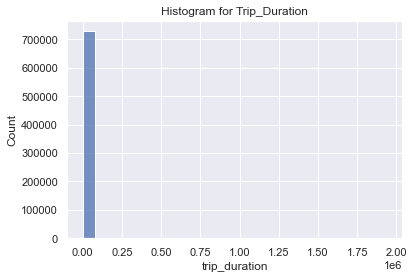

In [42]:
# Plotting a Histogram to inspect distribution and outliers
plt.title('Histogram for Trip_Duration')
sns.histplot(df['trip_duration'], kde=False, bins=25)

<AxesSubplot:title={'center':'Boxplot for Trip_Duration'}, xlabel='trip_duration'>

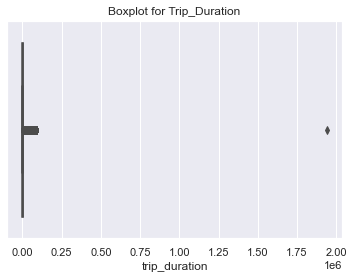

In [43]:
plt.title('Boxplot for Trip_Duration')
sns.boxplot(x = df['trip_duration'])

In [44]:
# Checking the outlier )maxium) row
df[df['trip_duration'] == df['trip_duration'].max()]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_by_weekday,dropoff_by_weekday,pickup_by_day,dropoff_by_day,pickup_by_hour,dropoff_by_hour,pickup_part_of_day,dropoff_part_of_day,distance,average_speed
21813,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.78965,40.643559,-73.95681,40.773087,N,...,1,2,Tuesday,Wednesday,0,11,Night,Morning,12.519817,0.023236


In [45]:
# Dopping the outlier from maxium

df.drop(df[df['trip_duration'] == 1939736.00].index, inplace = True)

In [46]:
# Checking the new maxium
df[df['trip_duration'] == df['trip_duration'].max()]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_by_weekday,dropoff_by_weekday,pickup_by_day,dropoff_by_day,pickup_by_hour,dropoff_by_hour,pickup_part_of_day,dropoff_part_of_day,distance,average_speed
259437,id0593332,2,2016-05-31 13:00:39,2016-06-01 13:00:30,1,-73.781952,40.644688,-73.993874,40.745926,N,...,1,2,Tuesday,Wednesday,13,13,Afternoon,Afternoon,13.121578,0.546789


### 4.4.2 Univariate Analysis for for vendor_id

In [48]:
df['vendor_id'].describe()

count    729321.000000
mean          1.535403
std           0.498745
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: vendor_id, dtype: float64

In [49]:
# Calculating additional statistics
add_stat('vendor_id')

Mode = 0    2
dtype: int64
Skew = -0.14197025212279726
Kurtosis = -1.9798444475121897
Null hypothesis of normality is rejected.


C:\Users\65917\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<AxesSubplot:xlabel='vendor_id', ylabel='count'>

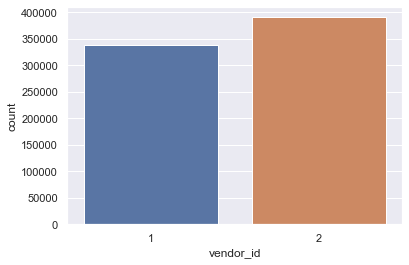

In [50]:
sns.countplot(x='vendor_id', data=df)

### 4.4.3 Univariate Analysis for passenger_count

In [52]:
df['passenger_count'].describe()

count    729321.000000
mean          1.662056
std           1.312446
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           9.000000
Name: passenger_count, dtype: float64

In [53]:
df.passenger_count.value_counts()

1    517414
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: passenger_count, dtype: int64

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

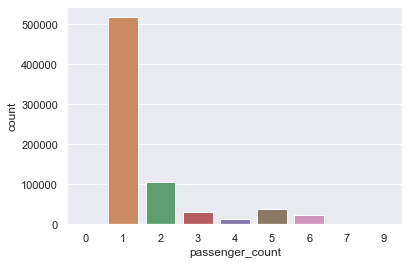

In [54]:
sns.countplot(x = 'passenger_count', data=df)

Observation: From the data we can safely conclude that most of the trips will include just one passenger.

### 4.4.4 Univariate Analysis for pickup_by_day and dropoff_by_day

In [55]:
df['pickup_by_day'].describe(include=object)

count     729321
unique         7
top       Friday
freq      111744
Name: pickup_by_day, dtype: object

In [56]:
df['dropoff_by_day'].describe(include=object)

count     729321
unique         7
top       Friday
freq      111509
Name: dropoff_by_day, dtype: object

<AxesSubplot:xlabel='pickup_by_day', ylabel='count'>

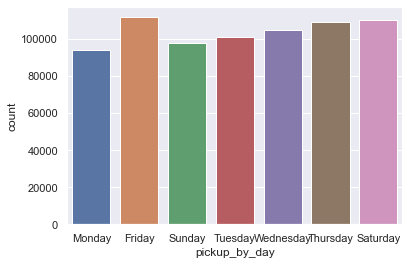

In [57]:
sns.countplot(x = 'pickup_by_day', data=df)

<AxesSubplot:xlabel='dropoff_by_day', ylabel='count'>

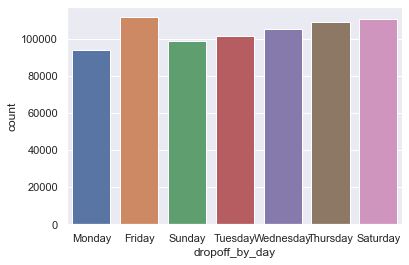

In [58]:
sns.countplot(x = 'dropoff_by_day', data=df)

**Observation**: We can see that Friday is the busiest day of the week. Followed by Saturdar and Thursday.

### 4.4.5 Univariate Analysis for distance

In [60]:
df['distance'].describe()

count    729321.000000
mean          2.138213
std           2.704889
min           0.000000
25%           0.765962
50%           1.302192
75%           2.408731
max         771.065969
Name: distance, dtype: float64

In [61]:
# Calculating additional statistics
add_stat('distance')

Mode = 0    0.0
dtype: float64
Skew = 40.983132210426184
Kurtosis = 9795.40134091124
Null hypothesis of normality is rejected.


C:\Users\65917\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [62]:
df['distance'].value_counts() 

0.000000     2901
0.000264       44
0.000264       31
0.000264       23
0.000791       22
             ... 
1.997195        1
2.046849        1
13.948851       1
5.180411        1
3.316373        1
Name: distance, Length: 726198, dtype: int64

**Observation**: We can see that there are 2,901 trips that have a distance of zero. We should investigate why they have zero distance. Lets see is we can get an idea why they have a distance of 0 or close to 0.

In [63]:
# Looking at the store_and_forward column for the minium
df[df['distance'] == df['distance'].min()]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_by_weekday,dropoff_by_weekday,pickup_by_day,dropoff_by_day,pickup_by_hour,dropoff_by_hour,pickup_part_of_day,dropoff_part_of_day,distance,average_speed
263,id3155891,2,2016-06-28 11:21:00,2016-06-28 11:25:00,2,-73.996422,40.298828,-73.996422,40.298828,N,...,1,1,Tuesday,Tuesday,11,11,Morning,Morning,0.0,0.0
327,id0786923,2,2016-03-26 13:34:38,2016-03-26 13:37:17,1,-73.996323,40.753460,-73.996323,40.753460,N,...,5,5,Saturday,Saturday,13,13,Afternoon,Afternoon,0.0,0.0
795,id2323213,2,2016-06-13 16:49:52,2016-06-13 17:04:49,5,-73.967171,40.763500,-73.967171,40.763500,N,...,0,0,Monday,Monday,16,17,Afternoon,Afternoon,0.0,0.0
1176,id3235868,1,2016-02-29 21:39:52,2016-02-29 21:44:08,1,-73.995232,40.744038,-73.995232,40.744038,N,...,0,0,Monday,Monday,21,21,Night,Night,0.0,0.0
1257,id1865738,2,2016-03-13 11:38:36,2016-03-13 12:00:46,2,-73.912781,40.804428,-73.912781,40.804428,N,...,6,6,Sunday,Sunday,11,12,Morning,Afternoon,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728720,id3423342,2,2016-05-05 21:32:43,2016-05-05 21:32:57,2,-73.977898,40.766392,-73.977898,40.766392,N,...,3,3,Thursday,Thursday,21,21,Night,Night,0.0,0.0
728775,id2618105,2,2016-03-13 20:06:40,2016-03-13 20:14:24,1,-73.974258,40.759895,-73.974258,40.759895,N,...,6,6,Sunday,Sunday,20,20,Evening,Evening,0.0,0.0
728838,id1232120,2,2016-05-29 04:04:32,2016-05-29 04:11:33,2,-73.984558,40.750839,-73.984558,40.750839,N,...,6,6,Sunday,Sunday,4,4,Night,Night,0.0,0.0
729025,id3524028,2,2016-04-06 18:03:34,2016-04-06 18:26:23,1,-74.083611,40.632401,-74.083611,40.632401,N,...,2,2,Wednesday,Wednesday,18,18,Evening,Evening,0.0,0.0


**Observation**: We can see that all of the trips with a distance of zero have the store_and_fwd_flag as No. We need to inspect this observation further.

### 4.4.6 Univariate Analysis for average_speed

In [64]:
df['average_speed'].describe()

count    729321.000000
mean          8.961097
std           7.668368
min           0.000000
25%           5.669598
50%           7.951604
75%          11.087719
max        3504.845312
Name: average_speed, dtype: float64

In [65]:
# Calculating additional statistics
add_stat('average_speed')

Mode = 0    0.0
dtype: float64
Skew = 194.01366329779924
Kurtosis = 76874.06048746621
Null hypothesis of normality is rejected.


C:\Users\65917\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [66]:
df['average_speed'].value_counts() 

0.000000     2901
0.316285        7
0.158142        4
0.094885        4
0.189771        3
             ... 
11.101963       1
7.273094        1
4.586088        1
3.572784        1
7.127515        1
Name: average_speed, Length: 726368, dtype: int64

**Observations** Again we see that 2,901 trips have an average speed of zero. We also see that the max speed is 3504.84 miles per hour, which is not possible. We need to explore both the miniums and maximum to see if they are outliers or errors.

In [67]:
df[df['average_speed'] == df['average_speed'].max()]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_by_weekday,dropoff_by_weekday,pickup_by_day,dropoff_by_day,pickup_by_hour,dropoff_by_hour,pickup_part_of_day,dropoff_part_of_day,distance,average_speed
244913,id2306955,1,2016-05-07 18:58:53,2016-05-07 19:12:05,1,-72.809669,51.881084,-73.987228,40.750599,N,...,5,5,Saturday,Saturday,18,19,Evening,Evening,771.065969,3504.845312


**Observations** Again we see some inconsistencies in the max trip. We can see that the trip had a distance of 771 miles but a trip duration of only one hour. We believe this input is an error and most be removed from the dataset.

### 4.5 Bivariate Analysis

In this section we will see the relationship between the target variable and selected features

<AxesSubplot:xlabel='vendor_id', ylabel='trip_duration'>

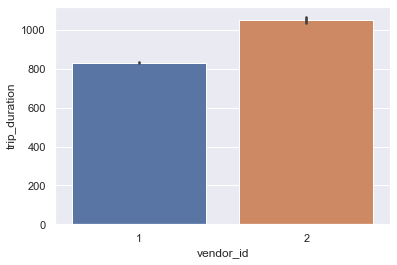

In [68]:
# Trip duration by vendor id
sns.barplot(x='vendor_id', y='trip_duration', data=df)

<AxesSubplot:xlabel='passenger_count', ylabel='trip_duration'>

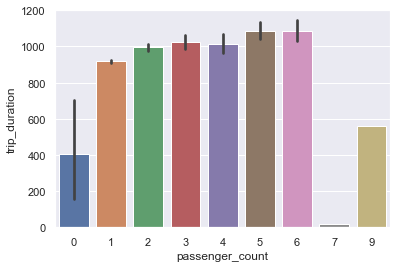

In [69]:
# Trip duration per passanger count
sns.barplot(x='passenger_count',y='trip_duration', data=df)

<AxesSubplot:xlabel='pickup_by_day', ylabel='trip_duration'>

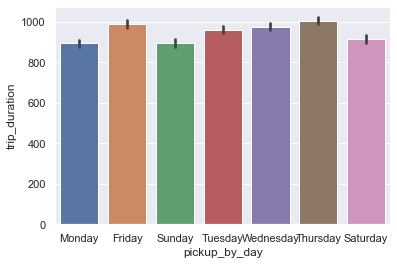

In [70]:
# Trip Duration by Day of the Week
sns.barplot(x="pickup_by_day", y='trip_duration', data=df)

<AxesSubplot:xlabel='pickup_part_of_day', ylabel='trip_duration'>

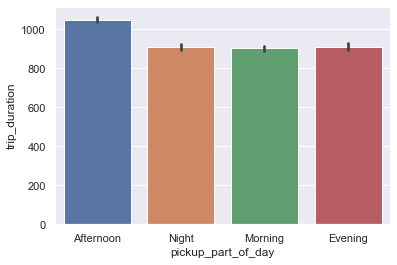

In [71]:
# Trip Duration by Day of the Week
sns.barplot(x="pickup_part_of_day", y='trip_duration', data=df)

<AxesSubplot:xlabel='pickup_by_day', ylabel='average_speed'>

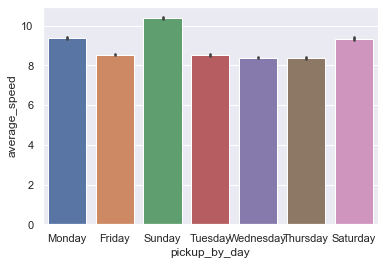

In [72]:
# Average Speed (Miles per Hour) by Day
sns.barplot(x="pickup_by_day", y='average_speed', data=df)

<AxesSubplot:xlabel='pickup_part_of_day', ylabel='trip_duration'>

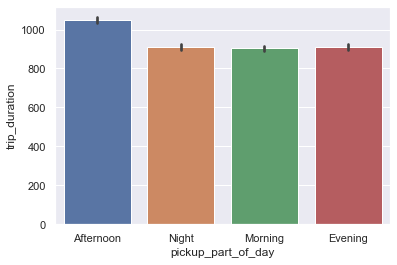

In [73]:
# Trip Duration by Day of the Week
sns.barplot(x="pickup_part_of_day", y='trip_duration', data=df)

<AxesSubplot:xlabel='pickup_by_hour', ylabel='trip_duration'>

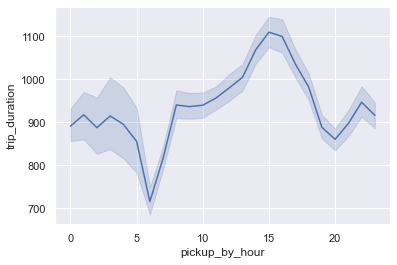

In [74]:
# Trip Duration per hour
sns.lineplot(x='pickup_by_hour', y='trip_duration', data=df)

**Observation**: We can see that the afternoon is the busiest time of the day. Most of the demand starts between 2:00 pm and 3:30 pm. Each trip last on average around 16.67 minutes.

### 4.6 Multivariate Analysis 

For this section we will calcualte the correlation of feature and we will visualize it using a heat map.

In [75]:
# Calculating the correlation
corr =df.corr()

In [78]:
corr

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_by_month,dropoff_by_month,pickup_by_weekday,dropoff_by_weekday,pickup_by_hour,dropoff_by_hour,distance,average_speed
vendor_id,1.000000,0.286462,0.008202,0.002857,0.002371,0.005260,0.035205,-0.005365,-0.005338,0.000786,0.000899,0.009769,0.009701,0.006516,0.001307
passenger_count,0.286462,1.000000,0.001164,-0.004698,-0.000027,-0.003944,0.016520,-0.001482,-0.001498,0.025757,0.025940,0.009849,0.009214,0.009178,-0.002637
pickup_longitude,0.008202,0.001164,1.000000,0.047648,0.780649,0.118472,0.041561,0.004043,0.004096,-0.016027,-0.016844,0.010762,0.011172,0.251472,0.095279
pickup_latitude,0.002857,-0.004698,0.047648,1.000000,0.119972,0.479358,-0.044442,-0.000172,-0.000240,-0.029078,-0.029257,0.011424,0.018059,-0.128440,0.116820
dropoff_longitude,0.002371,-0.000027,0.780649,0.119972,1.000000,0.149598,0.025331,0.003884,0.003923,-0.001472,-0.001396,-0.022014,-0.023193,0.132353,0.045955
dropoff_latitude,0.005260,-0.003944,0.118472,0.479358,0.149598,1.000000,-0.035451,-0.000579,-0.000620,-0.022027,-0.022396,0.014259,0.018173,-0.153765,-0.054264
trip_duration,0.035205,0.016520,0.041561,-0.044442,0.025331,-0.035451,1.000000,0.012861,0.013798,-0.001954,-0.003706,0.005488,0.004082,0.152153,-0.033842
pickup_by_month,-0.005365,-0.001482,0.004043,-0.000172,0.003884,-0.000579,0.012861,1.000000,0.999937,-0.013628,-0.013321,-0.003305,-0.004014,0.016589,-0.016811
dropoff_by_month,-0.005338,-0.001498,0.004096,-0.000240,0.003923,-0.000620,0.013798,0.999937,1.000000,-0.013607,-0.013269,-0.003048,-0.004386,0.016767,-0.016785
pickup_by_weekday,0.000786,0.025757,-0.016027,-0.029078,-0.001472,-0.022027,-0.001954,-0.013628,-0.013607,1.000000,0.993790,-0.082082,-0.085767,0.007792,0.044303


<AxesSubplot:>

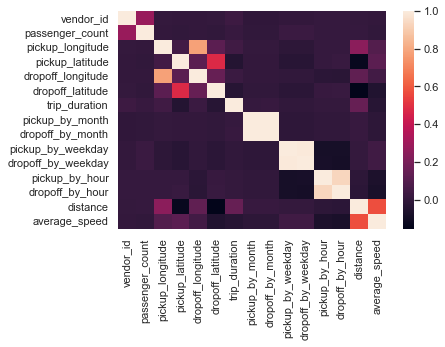

In [79]:
# Visualizing the relationship based on correlation
sns.heatmap(corr)